In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("kobe.csv")

In [4]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [5]:
df.head

<bound method NDFrame.head of              action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723  

In [2]:
qualitative_vars = ["action_type", "combined_shot_type", "game_event_id", "game_id", 
                    "period", "playoffs", "season", "shot_type",
                    "shot_zone_area", "shot_zone_basic", "shot_zone_range", "team_name", "game_date", "matchup", "opponent"]
quantitative_vars = [col for col in df.columns if col not in qualitative_vars + ["shot_made_flag", "shot_id", 'team_id']]  # garder le shot_id ? 

In [3]:
data = df.dropna()
X_quanti = data[quantitative_vars].values
X_quali = data[qualitative_vars].values
y = data["shot_made_flag"].values

In [8]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(X_quali)
one_hot_encoded_X = one_hot_encoder.transform(X_quali)
one_hot_encoded_X.toarray()
one_hot_encoder.get_feature_names_out()

array(['x0_Alley Oop Dunk Shot', 'x0_Alley Oop Layup shot',
       'x0_Cutting Layup Shot', ..., 'x14_UTA', 'x14_VAN', 'x14_WAS'],
      dtype=object)

In [9]:
one_hot_encoded_X

<25697x3952 sparse matrix of type '<class 'numpy.float64'>'
	with 385455 stored elements in Compressed Sparse Row format>

In [7]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X =imputer.fit_transform(X)

In [8]:
# Récupère dans un tableau toutes les valeurs cachées des shoots de kobe
unknown = [ligne for ligne in df.values if np.isnan(ligne[df.columns.get_loc('shot_made_flag')])]
len(unknown)

5000

L'intérêt de garder df est de faire une soustraction arithmétique pour pouvoir récupérer un dataset déjà split.
A voir si on récupère les bonnes réponses plus tard.

In [4]:

from sklearn.dummy import DummyClassifier

In [5]:
# I create an object of class DummyClassifier
dummy_classifier = DummyClassifier(strategy="constant", constant=0)
# I train it
dummy_classifier.fit(X, y)

NameError: name 'X' is not defined

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
prediction = neigh.predict(X)
accuracy = accuracy_score(y, prediction)
print("========= Accuracy of our KNN ============")
print(accuracy)

========= Accuracy of our KNN ============
0.9345059734599369


In [52]:
# Split intro 4 datasets: X_train, y_train, X_test, y_test, with a 70% / 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
liste = [1, 3, 5, 7, 9]
for i in liste:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    prediction = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, zero_division=0)
    recall = recall_score(y_test, prediction)
    print(f"========= Accuracy of our KNN for K = {i} ============")
    print(f"a = {accuracy}, p = {precision}, r = {recall}")

========= Accuracy of our KNN for K = 1 ============
a = 0.5260740971357409, p = 0.45789839944328464, r = 0.4695807314897413
========= Accuracy of our KNN for K = 3 ============
a = 0.5340909090909091, p = 0.46506510177883736, r = 0.4524531668153434
========= Accuracy of our KNN for K = 5 ============
a = 0.5438978829389788, p = 0.47592977156881255, r = 0.44977698483496875
========= Accuracy of our KNN for K = 7 ============
a = 0.5541718555417185, p = 0.4879388115316729, r = 0.4438893844781445
========= Accuracy of our KNN for K = 9 ============
a = 0.5586083437110835, p = 0.49336283185840707, r = 0.4376449598572703


## Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score, KFold

In [80]:
cross_val_accuracy = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="accuracy")
cross_val_precision = cross_val_score(estimator=dummy_classifier, X=X, y=y, scoring="precision")

c:\Users\Guilem\Documents\GitHub\miashs_introduction_ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guilem\Documents\GitHub\miashs_introduction_ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Guilem\Documents\GitHub\miashs_introduction_ml\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [81]:
print("========================================")
print(f"=== Average accuracy: {np.mean(cross_val_accuracy)}")
print(f"=== Median accuracy: {np.median(cross_val_accuracy)}")
print("========================================")
print("========================================")

print(f"=== Average precision: {np.mean(cross_val_precision)}")
print(f"=== Median precision: {np.median(cross_val_precision)}")
print("========================================")

=== Average accuracy: 0.5538389654757282
=== Median accuracy: 0.5538042420704418
=== Average precision: 0.0
=== Median precision: 0.0


In [91]:
liste = [1, 3, 5, 7, 9, 1001]
kf = KFold(n_splits=2)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     for k in liste:
          neigh = KNeighborsClassifier(n_neighbors=k)
          neigh.fit(X_train, y_train)
          prediction = neigh.predict(X_test)
          accuracy = accuracy_score(y_test, prediction)
          precision = precision_score(y_test, prediction, zero_division=0)
          recall = recall_score(y_test, prediction)
          print(f"========= Accuracy of our KNN for K = {k} ============")
          print(f"a = {accuracy}, p = {precision}, r = {recall}")

========= Accuracy of our KNN for K = 1 ============
a = 0.5323371468596778, p = 0.48676496713448214, r = 0.46757679180887374
========= Accuracy of our KNN for K = 3 ============
a = 0.5379406957739902, p = 0.49273995851404867, r = 0.44590443686006825
========= Accuracy of our KNN for K = 5 ============
a = 0.5433107634835396, p = 0.4992242048099302, r = 0.4392491467576792
========= Accuracy of our KNN for K = 7 ============
a = 0.5518717409915168, p = 0.5100790513833993, r = 0.44044368600682593
========= Accuracy of our KNN for K = 9 ============
a = 0.5555296131994708, p = 0.5152695224431236, r = 0.42901023890784984
========= Accuracy of our KNN for K = 1001 ============
a = 0.6004358315822242, p = 0.6094032549728752, r = 0.34505119453924915
========= Accuracy of our KNN for K = 1 ============
a = 0.5260740971357409, p = 0.45789839944328464, r = 0.4695807314897413
========= Accuracy of our KNN for K = 3 ============
a = 0.5340909090909091, p = 0.46506510177883736, r = 0.4524531668153

## Essai selon plan de la prof

In [8]:
from sklearn.preprocessing import OneHotEncoder

# On transforme les variables qualitatives en dummy (numérique)
one_hot_encoder = OneHotEncoder()
X_qualitative_dummy = one_hot_encoder.fit_transform(X_quali)
X_all = np.concatenate([X_quanti, X_qualitative_dummy.toarray()], axis=1)

# On part sur un KNNImputer, car nous avons montré dans la partie 2 que celui-ci est relativement
# efficace 
# On prend k=1 car nous avons des variables qualitatives

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=1)
X_all_imputed = knn_imputer.fit_transform(X_all)

# Regarder les valeurs aberrantes grâce à mes boxplots

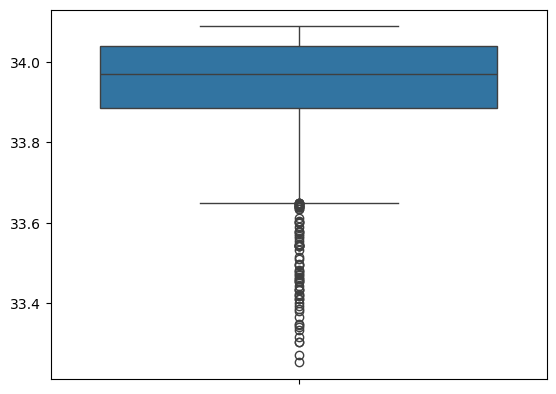

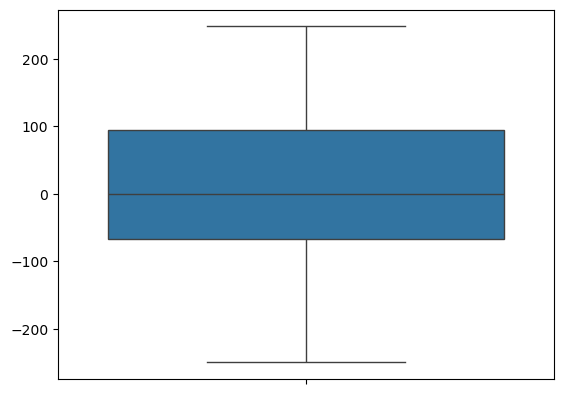

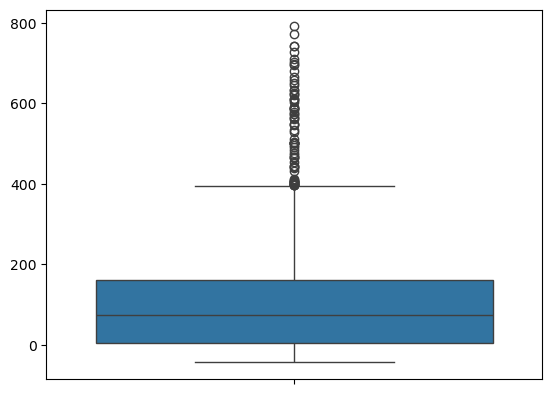

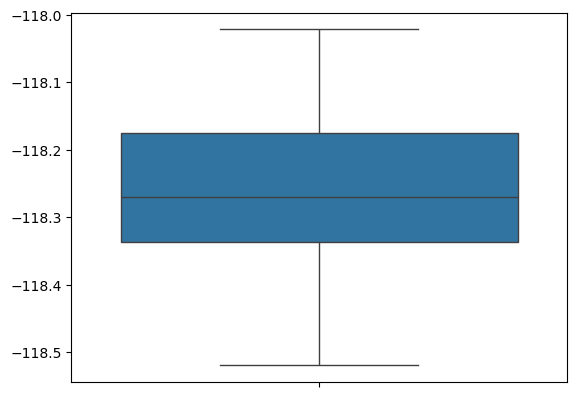

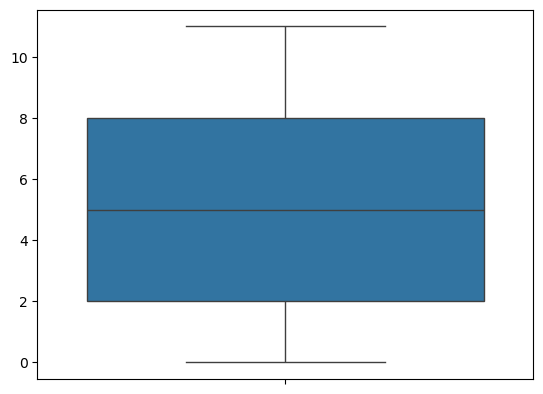

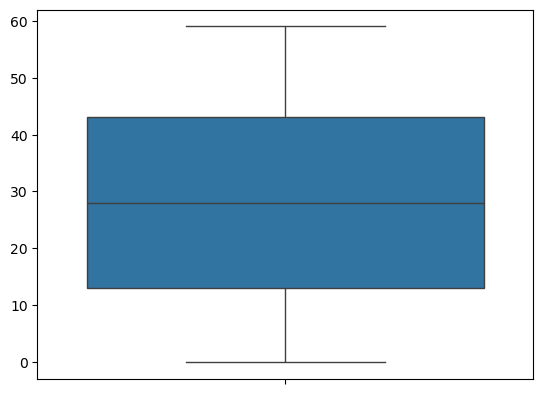

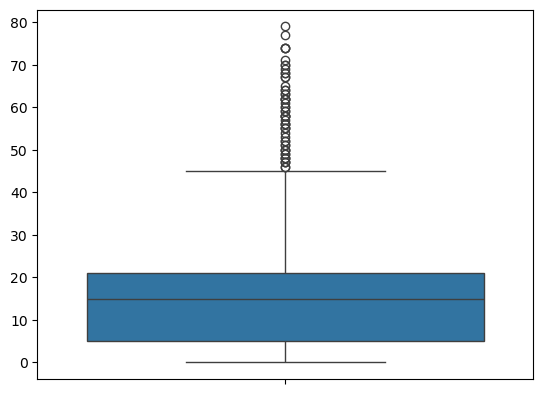

In [9]:
for X_val in X_quanti.T:
    sns.boxplot(X_val)
    plt.show()
    
# Après l'examen des boxplots, je ne vois pas de valeur aberrantes: il y a certes des passagers beaucoup plus âgés que 
# la répartition médiane, mais cela est porteur de sens pour la classification.
# Idem pour le prix des billets: il n'est pas choquant qu'un bateau de luxe offre des billets extrêmement chers
# et certains beaucoup moins.

In [10]:
X_preprocessed = X_all_imputed

In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Sans scaling
for k in range(1, 30, 2):
    print(f"k = {k}")
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(estimator=knn_classifier, X=X_preprocessed, y=y, scoring="accuracy")
    print(f"Model score: {round(np.median(scores)*100, 2)}%")

k = 1
Model score: 54.92%
k = 3
Model score: 56.26%
k = 5
Model score: 57.14%
k = 7
Model score: 57.47%
k = 9
Model score: 57.5%
k = 11
